# Question 1

In [22]:
import cv2
import pywt
import pywt.data

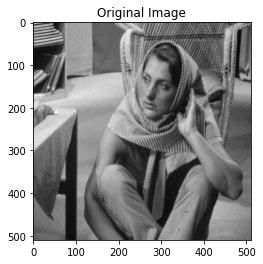

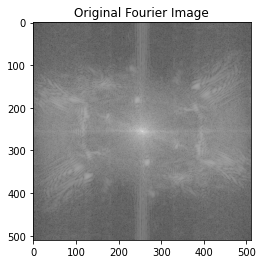

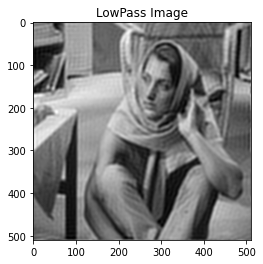

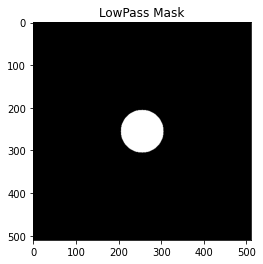

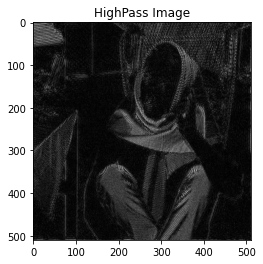

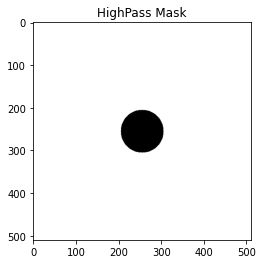

In [15]:
def create_fourier_filter(size1,size2,radius,type_of_filter="low"):

   mk = np.zeros((size1,size2), dtype = int)
   for i in range(size1):
     for j in range(size2):
       distance = (((i-(size1//2))**2)+((j-(size2//2))**2))**0.5
       if distance <= radius:
         mk[i][j] = 1

   if type_of_filter == "low":
     return mk
   elif type_of_filter == "high":
     return 1-mk

import numpy as np

img = cv2.imread("/content/barbara_cv2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fast_fourier_transform_img = np.fft.fftshift(np.fft.fft2(img))
mask_low = create_fourier_filter(img.shape[0], img.shape[1],  50, "low")
fft_lowPass = np.multiply(fast_fourier_transform_img, mask_low)
lowPass = abs(np.fft.ifft2(fft_lowPass))

mask_high = create_fourier_filter(img.shape[0], img.shape[1],  50, "high")
fft_highPass = np.multiply(fast_fourier_transform_img, mask_high)
highPass = abs(np.fft.ifft2(fft_highPass))

import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.show()

plt.imshow(np.log(abs(fast_fourier_transform_img)), cmap='gray')
plt.title("Original Fourier Image")
plt.show()

plt.imshow(lowPass, cmap="gray")
plt.title("LowPass Image")
plt.show()

plt.imshow(mask_low, cmap='gray')
plt.title("LowPass Mask")
plt.show()

plt.imshow(highPass, cmap="gray")
plt.title("HighPass Image")
plt.show()

plt.imshow(mask_high, cmap='gray')
plt.title("HighPass Mask")
plt.show()



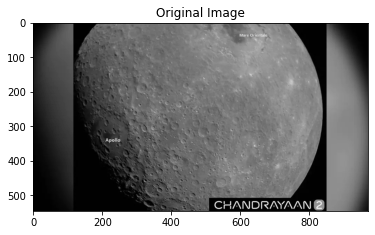

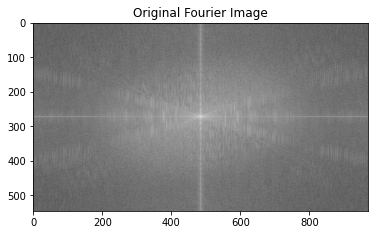

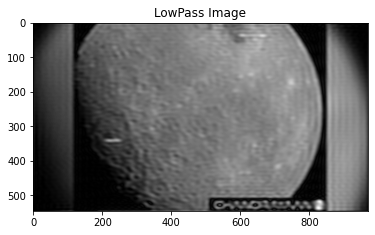

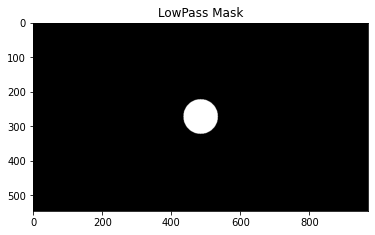

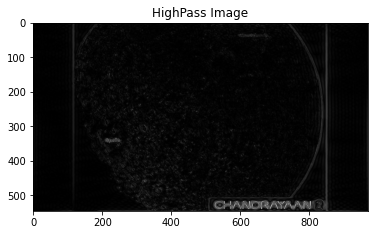

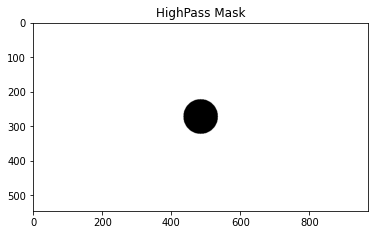

In [16]:
img = cv2.imread("/content/chandrayaan.webp")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fast_fourier_transform_img = np.fft.fftshift(np.fft.fft2(img))
mask_low = create_fourier_filter(img.shape[0], img.shape[1],  50, "low")
fft_lowPass = np.multiply(fast_fourier_transform_img, mask_low)
lowPass = abs(np.fft.ifft2(fft_lowPass))

mask_high = create_fourier_filter(img.shape[0], img.shape[1],  50, "high")
fft_highPass = np.multiply(fast_fourier_transform_img, mask_high)
highPass = abs(np.fft.ifft2(fft_highPass))

import matplotlib.pyplot as plt

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.show()

plt.imshow(np.log(abs(fast_fourier_transform_img)), cmap='gray')
plt.title("Original Fourier Image")
plt.show()

plt.imshow(lowPass, cmap="gray")
plt.title("LowPass Image")
plt.show()

plt.imshow(mask_low, cmap='gray')
plt.title("LowPass Mask")
plt.show()

plt.imshow(highPass, cmap="gray")
plt.title("HighPass Image")
plt.show()

plt.imshow(mask_high, cmap='gray')
plt.title("HighPass Mask")
plt.show()


# Question 2

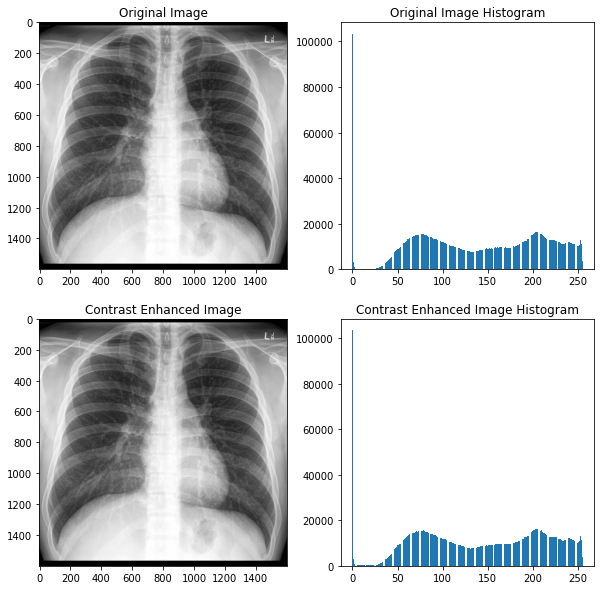

In [26]:
img = cv2.imread("/content/normal-frontal-chest-x-ray.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

import copy

def Histogram_Equalization(img1):
    freq_original = [0]*256
    freq_modified = [0]*256
    minV = np.min(img1)
    maxV = np.max(img1)

    x, y = img1.shape
    for i in range(x):
        for j in range(y):
            freq_original[img1[i][j]]+=1
  
    cdf = [sum(freq_original[:i+1]) for i in range(256)]
  
    Dictionary = {}
    for i in range(256):
        Dictionary[i] = round(((cdf[i]-cdf[0])/((x*y)-cdf[0]))*255)
  
    img_modified = copy.deepcopy(img)
    for i in range(x):
        for j in range(y):
            img_modified[i][j] = Dictionary[img1[i][j]]
            freq_modified[img_modified[i][j]]+=1
    
    return img_modified


def Enhancing_Contrast(img):
    
    img2 = Histogram_Equalization(img)
    coefficients_1 = pywt.wavedec2(img, 'db1', level=2)
    coefficients_2 = pywt.wavedec2(img2, 'db1', level=2)
    u1, s1, vh1 = np.linalg.svd(coefficients_1[0], full_matrices=True)
    u2, s2, vh2 = np.linalg.svd(coefficients_2[0], full_matrices=True)
    coefficients = s2[0]/s1[0]
    coefficients_2[0] = coefficients*coefficients_1[0]
    extracted_wavelet_image = pywt.waverec2(coefficients_1,'db1')

    return extracted_wavelet_image


def Freq(img):
    freq = [0]*256
    x, y = img.shape
    for i in range(x):
        for j in range(y):
            freq[int(img[i][j])]+=1
    return freq


image = cv2.imread("/content/normal-frontal-chest-x-ray.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
enhanced_image = Enhancing_Contrast(image)
freqency_original = Freq(image)
freqency_Enhanced = Freq(enhanced_image)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.bar([x for x in range(256)], freqency_original)
plt.title("Original Image Histogram")

plt.subplot(2, 2, 3)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Contrast Enhanced Image")

plt.subplot(2, 2, 4)
plt.bar([x for x in range(256)], freqency_Enhanced)
plt.title("Contrast Enhanced Image Histogram")
plt.show()


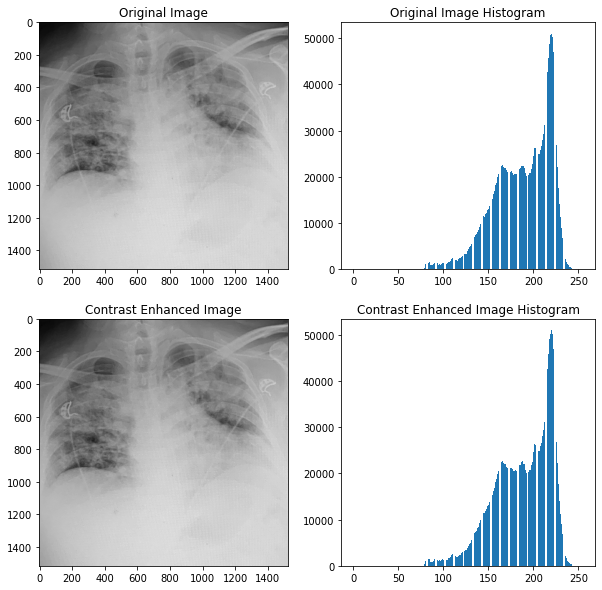

In [25]:
image = cv2.imread("/content/figure1.jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
enhanced_image = Enhancing_Contrast(image)
freqency_original = Freq(image)
freqency_Enhanced = Freq(enhanced_image)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.bar([x for x in range(256)], freqency_original)
plt.title("Original Image Histogram")

plt.subplot(2, 2, 3)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Contrast Enhanced Image")

plt.subplot(2, 2, 4)
plt.bar([x for x in range(256)], freqency_Enhanced)
plt.title("Contrast Enhanced Image Histogram")
plt.show()


# Question 3

Erosion_Dilation


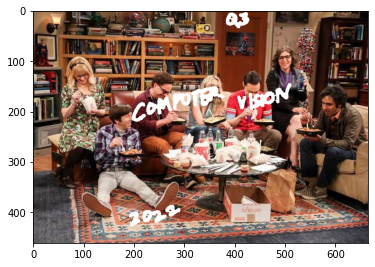

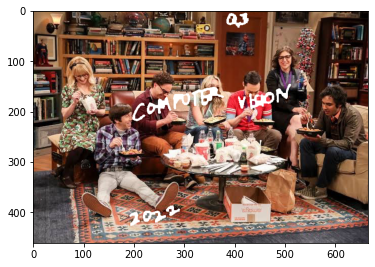

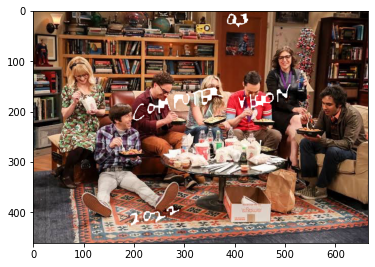

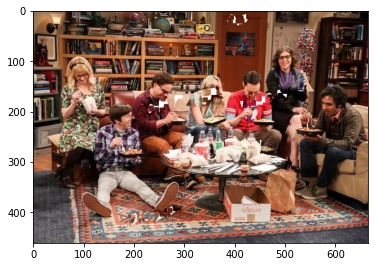

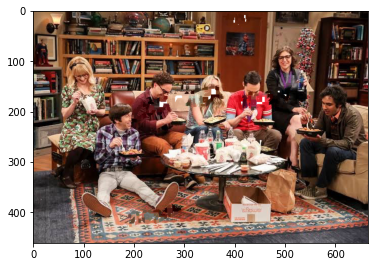

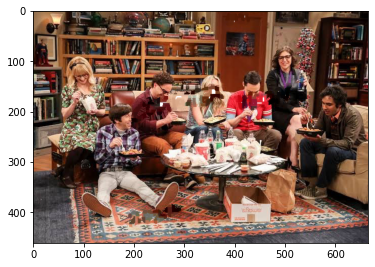

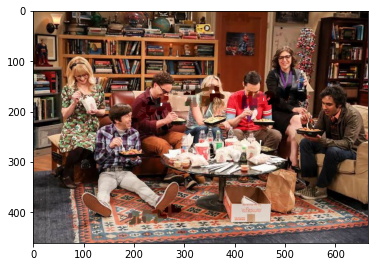


Median_Blur


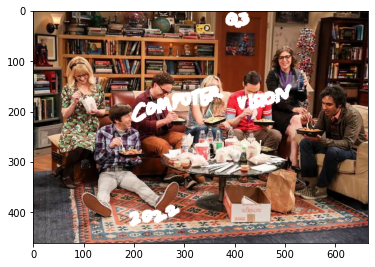

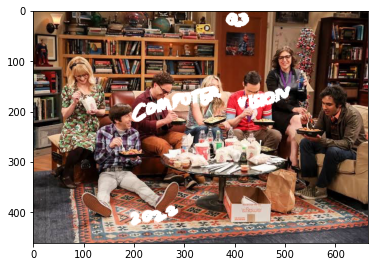

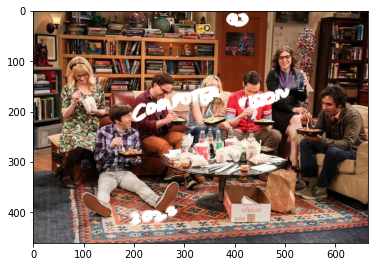

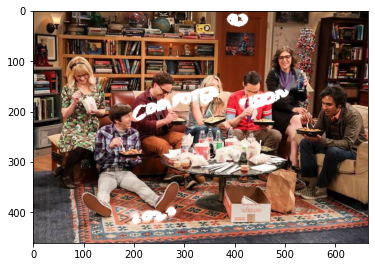

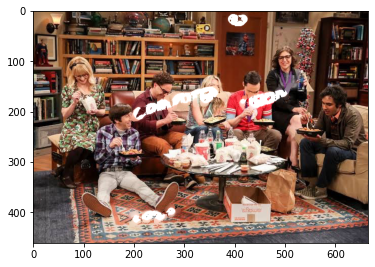

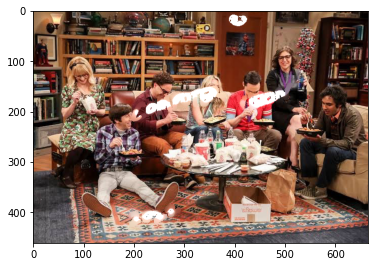

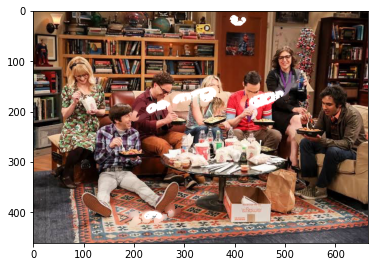

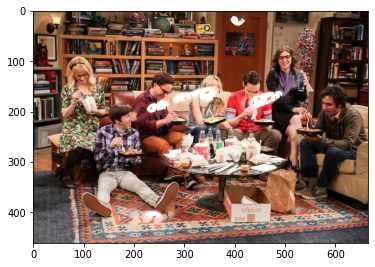

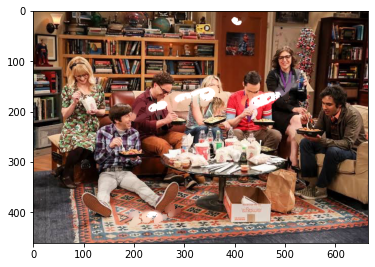

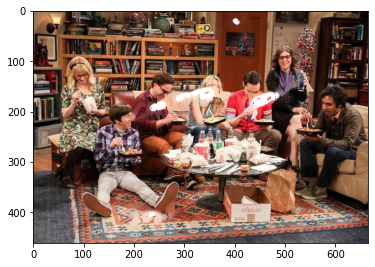

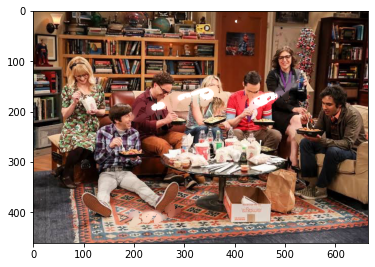

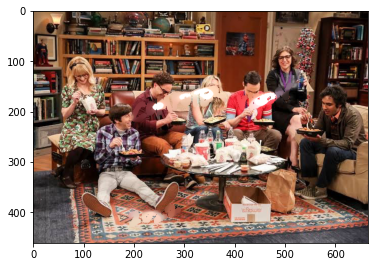

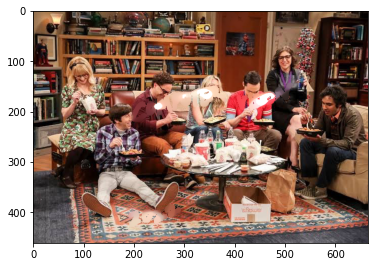

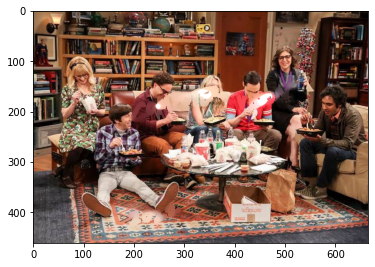

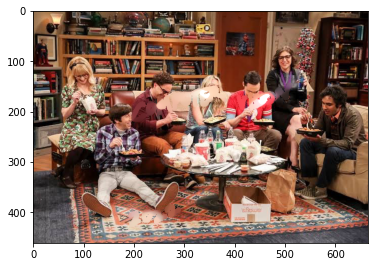

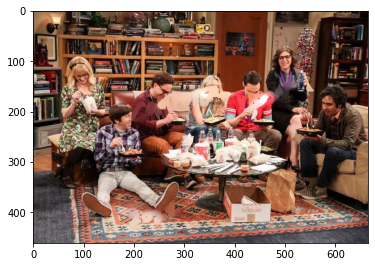

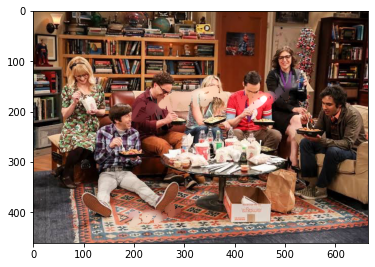

In [18]:
def merge(img, reference_img, binary_mask):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if binary_mask[i][j]>0:
                img[i][j][0] = reference_img[i][j][0]
                img[i][j][1] = reference_img[i][j][1]
                img[i][j][2] = reference_img[i][j][2]
    return img

import copy
def median_blur(img, binary_mask):
    image = copy.deepcopy(img)
    for i in range(17):
        inpainted_image = cv2.medianBlur(image, 15)
        img = merge(image, inpainted_image, binary_mask)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.show()
    return image

def erosion_dilation(img, binary_mask):
    image = copy.deepcopy(img)
    size = [3 for i in range(7)]
    for i in range(7):
        kernel = np.ones((size[6-i], size[6-i]),np.uint8)
        inpainted_image = cv2.erode(img, kernel, 1)
        img = merge(image, inpainted_image, binary_mask)
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.show()
    return image

img = cv2.imread("/content/friends.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
binary_mask = cv2.imread("/content/mask.png",0)

temp = np.ones((img.shape[0], img.shape[1], 3), dtype = int)
temp = temp*255
img = merge(img, temp, binary_mask)
print("Erosion_Dilation")
inpaint_erosion_dilation = erosion_dilation(img, binary_mask)

print("\nMedian_Blur")
inpaint_median_blur = median_blur(img, binary_mask)


# Question 4

In [31]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

In [19]:
def merge(img1, img2):
    orb = cv2.xfeatures2d.SIFT_create()
    bf = cv2.BFMatcher()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    commonPoints = bf.knnMatch(des1, des2, k = 2)
    finalCommonPoints = []
    for i in range(len(commonPoints)):
        if commonPoints[i][0].distance <= 0.6*commonPoints[i][1].distance:
            finalCommonPoints.append(commonPoints[i][0])
    
    source_pts = np.float32([kp1[x.queryIdx].pt for x in finalCommonPoints]).reshape(-1,1,2)
    destination_pts = np.float32([kp2[x.trainIdx].pt for x in finalCommonPoints]).reshape(-1,1,2)
  

    H,temp = cv2.findHomography(source_pts, destination_pts, cv2.RANSAC, 5.0)
  
    rect1 = np.float32([[0,0], [0, img2.shape[0]],[img2.shape[1], img2.shape[0]], [img2.shape[1], 0]]).reshape(-1, 1, 2)
    rect2 = np.float32([[0,0], [0, img1.shape[0]],[img1.shape[1], img1.shape[0]], [img1.shape[1], 0]]).reshape(-1, 1, 2)
    rect2 = cv2.perspectiveTransform(rect2, H)
    
    transform = np.concatenate((rect1,rect2), axis=0)

    [x_min, y_min] = np.int32(transform.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(transform.max(axis=0).ravel() + 0.5)

    translation_distance = [-x_min,-y_min]
    H_translation = np.array([[1, 0, translation_distance[0]], [0, 1, translation_distance[1]], [0, 0, 1]])

    output = cv2.warpPerspective(img1, H_translation.dot(H), (x_max-x_min, y_max-y_min))
    output[translation_distance[1]:img2.shape[0]+translation_distance[1], translation_distance[0]:img2.shape[1]+translation_distance[0]] = img2
    
    return output



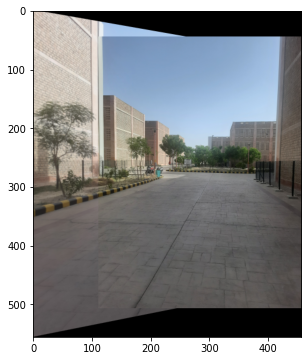

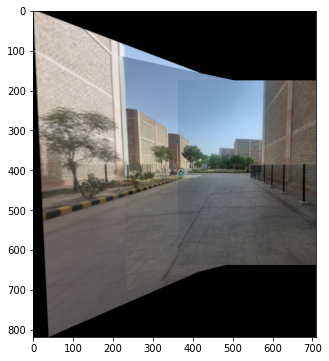

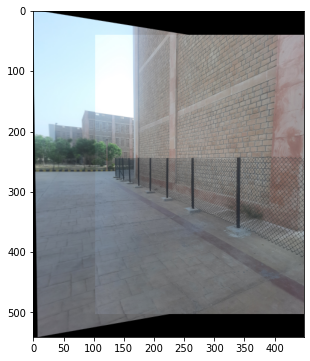

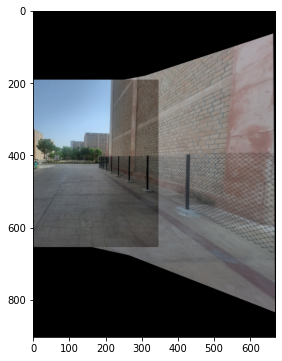

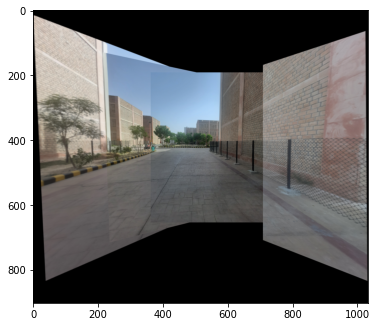

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


left = cv2.imread("/content/1.jpg")
left = cv2.resize(left, (int(left.shape[1]*0.1), int(left.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
img = cv2.imread("/content/2.jpg")
img = cv2.resize(img, (int(img.shape[1]*0.1), int(img.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
left = merge(left, img)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB))
plt.show()

img = cv2.imread("/content/3.jpg")
img = cv2.resize(img, (int(img.shape[1]*0.1), int(img.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
left = merge(left, img)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB))
plt.show()


right = cv2.imread("/content/4.jpg")
right = cv2.resize(right, (int(right.shape[1]*0.1), int(right.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
img = cv2.imread("/content/5.jpg")
img = cv2.resize(img, (int(img.shape[1]*0.1), int(img.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
right = merge(right, img)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
plt.show()

img = cv2.imread("/content/3.jpg")
img = cv2.resize(img, (int(img.shape[1]*0.1), int(img.shape[0]*0.1)), interpolation = cv2.INTER_AREA)
right = merge(right, img)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
plt.show()


panaroma = merge(right, left)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(panaroma, cv2.COLOR_BGR2RGB))
plt.show()
